<a href="https://colab.research.google.com/github/ChowMeinFan/Classifying-Cells-Using-Machine-Learning/blob/main/ClassifyingCells(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount our Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import necessary packages
import numpy as np
from tensorflow import keras
from keras import layers
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Nadam, Adamax, Lion, Adafactor
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from mlxtend.evaluate import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf

image_size = (1097, 1097)
#classes = ['COS7', 'HEK293T', 'L', 'NC']


train_path = '/content/drive/MyDrive/CSC308CellImagesV2/TrainingData'
test_path = '/content/drive/MyDrive/CSC308CellImagesV2/TestingData'
valid_path = '/content/drive/MyDrive/CSC308CellImagesV2/ValidationData'

In [ ]:
#Assign variables to our preseparated datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=image_size, batch_size=14, label_mode='categorical')
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(valid_path, image_size=image_size, batch_size=3, label_mode='categorical')
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=image_size, batch_size=3, label_mode='categorical')

class_names = train_dataset.class_names
print(class_names)

Found 84 files belonging to 4 classes.
Found 12 files belonging to 4 classes.
Found 24 files belonging to 4 classes.
['COS7', 'HEK293T', 'L', 'NC']


In [ ]:
#One hot encode image labels
#def onehot(image, label):
#  label = tf.cast(label, tf.int32)
#  label = tf.one_hot(label, len(class_names))
#  return image, label

#train_dataset = train_dataset.map(onehot)
#test_dataset = test_dataset.map(onehot)
#valid_dataset = valid_dataset.map(onehot)

In [ ]:
#Function to track time, Initialize a callback object
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
#Create a Neural Network Model
model = Sequential(
    [
        keras.Input(shape=(1097, 1097, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="softmax"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="softmax"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="softmax"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="softmax"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation="softmax"),
    ]
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1095, 1095, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 547, 547, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 545, 545, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 272, 272, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 270, 270, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 135, 135, 128)     0

In [ ]:
#Compile and Fit our Neural Network
model.compile( optimizer=Adam(learning_rate =.01),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(
     train_dataset,
     validation_data = valid_dataset,
     epochs=75,
     callbacks=[cb],
     verbose=1)
print("Training Complete!")

Epoch 1/75
6/6 [==============================] - 38s 961ms/step - loss: 22.3422 - accuracy: 0.2143 - val_loss: 12.2889 - val_accuracy: 0.2500
Epoch 2/75
6/6 [==============================] - 4s 445ms/step - loss: 16.6627 - accuracy: 0.1429 - val_loss: 10.5079 - val_accuracy: 0.2500
Epoch 3/75
6/6 [==============================] - 5s 434ms/step - loss: 7.8405 - accuracy: 0.2738 - val_loss: 12.3655 - val_accuracy: 0.2500
Epoch 4/75
6/6 [==============================] - 4s 409ms/step - loss: 12.7835 - accuracy: 0.2143 - val_loss: 5.7854 - val_accuracy: 0.2500
Epoch 5/75
6/6 [==============================] - 4s 412ms/step - loss: 7.9014 - accuracy: 0.2024 - val_loss: 6.5804 - val_accuracy: 0.2500
Epoch 6/75
6/6 [==============================] - 4s 518ms/step - loss: 6.8870 - accuracy: 0.2857 - val_loss: 1.6911 - val_accuracy: 0.2500
Epoch 7/75
6/6 [==============================] - 5s 432ms/step - loss: 7.7834 - accuracy: 0.2381 - val_loss: 5.6260 - val_accuracy: 0.2500
Epoch 8/75
6/

In [ ]:
#Output our callback object
print(cb.logs)
print("Total Model Training Time:", sum(cb.logs))

[38.43117878099997, 3.7573599900000545, 4.565998938000007, 3.6197032649999983, 3.6034000769999466, 4.1567843519999315, 4.597530812999935, 3.5399087959999633, 3.585989378000022, 6.2219378170000255, 5.346886678000033, 3.5063591829999723, 3.606730448999997, 4.835482891999959, 3.942548372000033, 3.6517110119999643, 3.5140834559999803, 6.781584236999947, 4.7321651760000805, 3.752534069000035, 4.83850609600006, 3.493752969999946, 3.402980765000052, 3.6721160289999943, 4.9640018430000055, 3.8026914339999394, 3.629183542000078, 3.6123768779999637, 4.624046936000013, 3.5775168760000042, 3.6226006080000843, 3.8520649060000096, 4.6620941889999585, 3.5604045489999407, 3.5726504340000247, 3.705858332000048, 5.124780353000006, 3.9907573839999486, 4.70002892499997, 3.5300793160000694, 3.7176717730000064, 4.08061700899998, 4.233348701999944, 3.5875242079999907, 3.5003737310000815, 4.496288721000042, 3.500869066000064, 3.606930680000005, 4.057600539999953, 4.4026225650000015, 3.4968429369999967, 3.5616

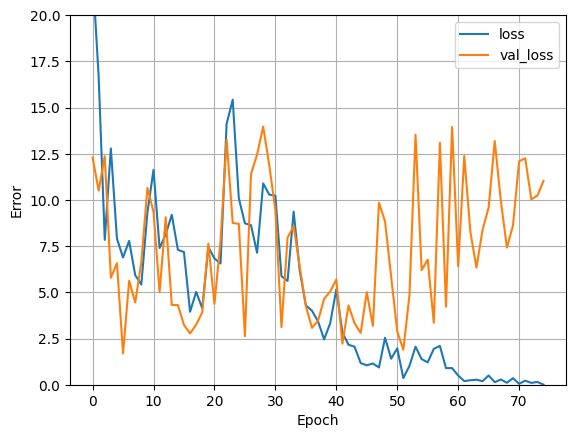

In [ ]:
#Learning Curve
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
#Evaluate our model
score = model.evaluate(test_dataset, steps = 1, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 23.698936462402344
Test accuracy: 0.0


Confusion matrix, without normalization
[[1 0 0]
 [0 0 0]
 [0 2 0]]


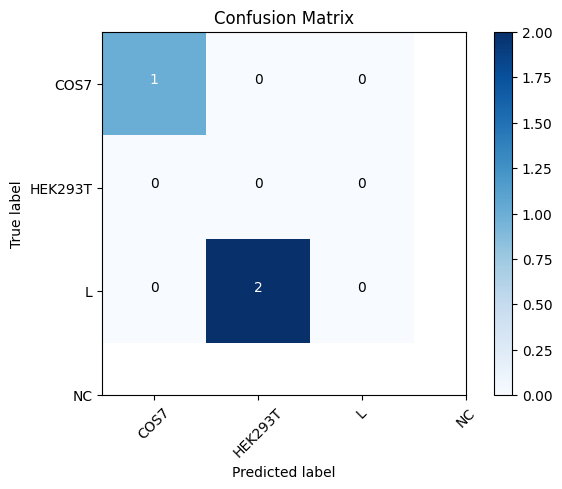

In [ ]:
#Create a Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_imgs, test_labels = next(iter(test_dataset))
predictions = model.predict(test_dataset, steps=1, verbose=0)
cm = confusion_matrix(test_labels.numpy().argmax(axis=1), predictions.argmax(axis=1), binary=False)
cm_plot_labels = class_names
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')